<a href="https://colab.research.google.com/github/Sonal-Sukanya/Its-my-repository/blob/main/Porp_Perm_Crossplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()  # Browse and upload your kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sonalsukanya","key":"3ffb9ac3e6c8c2594ada343d548c2aad"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d sahasourav17/well-logs

Dataset URL: https://www.kaggle.com/datasets/sahasourav17/well-logs
License(s): apache-2.0
  0% 0.00/2.19M [00:00<?, ?B/s]
100% 2.19M/2.19M [00:00<00:00, 527MB/s]


In [4]:
import zipfile
import os

# Locate the zip file
zip_file = [f for f in os.listdir() if f.endswith('.zip')][0]
with zipfile.ZipFile(zip_file, 'r') as z:
    z.extractall('well_logs')

os.listdir('well_logs')


['A15',
 'A10',
 'B9.dev',
 'C4.dev',
 'Wellheader',
 'C3.dev',
 'B8',
 'B4',
 'C2.dev',
 'C5',
 'B8.dev',
 'C2',
 'B2',
 'C6.dev',
 'C7.dev',
 'B4.dev',
 'B2.dev',
 'A15.dev',
 'C1.dev',
 'C5.dev',
 'B9',
 'C3',
 'B1.dev',
 'C1',
 'A10.dev',
 'A16.dev',
 'C4',
 'A16']

In [5]:
!pip install lasio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.6 MB/s eta 0:00:00


In [6]:
import lasio

# Load one file, for example 'C2'
las = lasio.read("well_logs/C2")

# Convert to DataFrame
df = las.df()
df.head()


,GAMMA,PERM,POROSITY,RESISTIVITY,LITH
DEPT,,,,,
1924.8362,NaN,NaN,NaN,NaN,NaN
1925.3362,78.643066,0.001017,0.001737,1.221142,2.0
1925.8362,74.577850,0.001090,0.001767,1.352299,2.0
1926.3362,72.157539,0.001338,0.001786,1.989355,2.0
1926.8362,70.538605,0.001670,0.001792,3.078198,2.0


In [46]:
print(df.columns)  # Typical: GR, NPHI, RHOB, etc.
df['POROSITY']=100*df['POROSITY']

Index(['GAMMA', 'PERM', 'POROSITY', 'RESISTIVITY', 'LITH'], dtype='object')


In [47]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1085 entries, 1925.3362 to 2469.3362
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GAMMA        1085 non-null   float64
 1   PERM         1085 non-null   float64
 2   POROSITY     1085 non-null   float64
 3   RESISTIVITY  1085 non-null   float64
 4   LITH         1085 non-null   float64
dtypes: float64(5)
memory usage: 50.9 KB


In [82]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


/tmp/ipython-input-49-3158556812.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  p=sns.scatterplot(x=df['POROSITY'],y=df['PERM'],palette='YlOrRd',s=50)


Text(0.5, 0, 'Core_Porosity (%)')

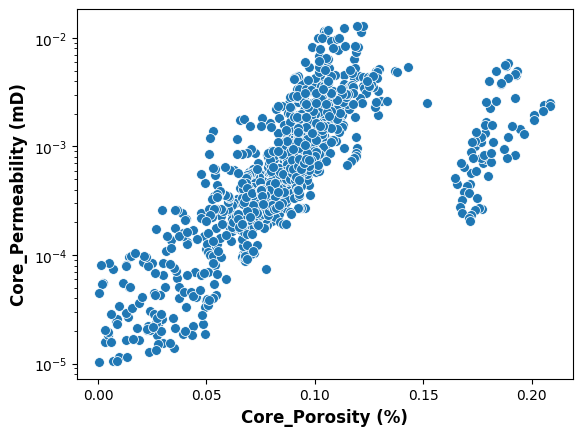

In [49]:

p=sns.scatterplot(x=df['POROSITY'],y=df['PERM'],palette='YlOrRd',s=50)
p.set(yscale='log')
p.set_ylabel('Core_Permeability (mD)',fontsize=12,fontweight='bold')
p.set_xlabel('Core_Porosity (%)',fontsize=12,fontweight='bold')

In [65]:
x=np.log10(df['POROSITY'].values)
y=np.log10(df['PERM'].values)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [68]:
model = LinearRegression()


In [69]:
model.fit(x, y)

LinearRegression()

In [70]:
r2 = model.score(x, y)
r2

0.523033560243797

In [71]:
model.intercept_

array([-1.35718747])

In [72]:
model.coef_

array([[1.66580885]])

In [74]:
m = model.coef_[0][0]
b = model.intercept_[0]
regression_eq = f'CKHL = CPOR**({m:.4f}) * 10**({b:.4f})'
print("Regression Equation:", regression_eq)

Regression Equation: CKHL = CPOR**(1.6658) * 10**(-1.3572)


In [75]:
x_plot_vals = np.linspace(np.log10(0.1), np.log10(50), 100).reshape(-1, 1)
y_pred = model.predict(x_plot_vals)

In [76]:
x_plot_original = 10**x_plot_vals
y_pred_original = 10**y_pred

In [79]:
results_df = pd.DataFrame({
    'por_vals': x_plot_original.flatten(),
    'perm_vals': y_pred_original.flatten()
})
results_df.head()

,por_vals,perm_vals
0,0.100000,0.000948
1,0.106479,0.001053
2,0.113377,0.001169
3,0.120722,0.001298
4,0.128543,0.001441
